<a href="https://colab.research.google.com/github/wardla2/Data-Science-Portfolio/blob/main/Project_1/2510_LWard_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Prediction Using Gaussian Naive Bayes

## Problem Definition


The business needs to understand and anticipate customer behavior: specifically, whether or not a future customer will make a transaction. This project addresses a supervised binary classification problem where the goal is to predict whether a future customer will make a transaction, using Gaussian Naive Bayes on anonymized transaction data.

## Data Overview

The data source is an anonymized data hosted in an AWS S3 bucket.

https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv

## Imports

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## File Paths

File paths for train and test data.

In [ ]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_path = base_path + 'Transaction.train.big.csv'


In [ ]:
url = train_path
url


'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'

In [ ]:
# Load data 'transaction.train.big.csv' from AWS S3

trans_df = pd.read_csv( url )
trans_df


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


### Backup 1

In [ ]:
# Make a backup copy of the data frame

trans_df_bak1 = trans_df.copy()
trans_df_bak1


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [ ]:
trans_df.describe()


,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
count,1.050000e+06,180000.000000,180000.000000,180000.000000,180000.000000,0.0,180000.000000,0.0,0.0,180000.000000,...,0.0,180000.000000,0.0,180000.000000,0.0,0.0,0.0,0.0,0.0,180000.000000
mean,5.249995e+05,0.100222,7.440715,15.870166,12.735619,NaN,-0.668334,NaN,NaN,1.190419,...,NaN,-3.294620,NaN,-6.727860,NaN,NaN,NaN,NaN,NaN,14.224538
std,3.031090e+05,0.300297,3.021636,3.010492,4.185923,NaN,5.968300,NaN,NaN,5.169343,...,NaN,7.418545,NaN,8.278554,NaN,NaN,NaN,NaN,NaN,0.171058
min,0.000000e+00,0.000000,-2.691700,6.299300,-1.018500,NaN,-22.748700,NaN,NaN,-15.194000,...,NaN,-29.984000,NaN,-35.211700,NaN,NaN,NaN,NaN,NaN,13.729000
25%,2.624998e+05,0.000000,5.160325,13.830400,9.664675,NaN,-4.997500,NaN,NaN,-2.571400,...,NaN,-8.757925,NaN,-12.835875,NaN,NaN,NaN,NaN,NaN,14.098900
50%,5.249995e+05,0.000000,7.350950,15.934600,12.670700,NaN,-0.560300,NaN,NaN,1.194600,...,NaN,-3.170950,NaN,-6.615100,NaN,NaN,NaN,NaN,NaN,14.226800
75%,7.874992e+05,0.000000,9.511125,18.061425,15.837300,NaN,3.632525,NaN,NaN,5.090450,...,NaN,2.043350,NaN,-0.885250,NaN,NaN,NaN,NaN,NaN,14.361800
max,1.049999e+06,1.000000,16.716500,26.079100,26.997600,NaN,18.855400,NaN,NaN,18.471400,...,NaN,21.236400,NaN,18.105600,NaN,NaN,NaN,NaN,NaN,14.743000


In [ ]:
trans_df.shape


(1050000, 104)

In [ ]:
trans_df.size

109200000

In [ ]:
trans_df.head(10)


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,train_5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
6,6,train_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,train_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,train_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,train_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trans_df.tail(10)


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
1049990,1049990,train_1049990,0.0,7.9632,20.4650,10.7295,NaN,2.9322,NaN,NaN,...,NaN,10.4219,NaN,-19.7158,NaN,NaN,NaN,NaN,NaN,14.0582
1049991,1049991,train_1049991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049992,1049992,train_1049992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049993,1049993,train_1049993,0.0,5.0862,14.4785,17.3709,NaN,-2.4732,NaN,NaN,...,NaN,-2.8052,NaN,-13.7290,NaN,NaN,NaN,NaN,NaN,14.3794
1049994,1049994,train_1049994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049999,1049999,train_1049999,0.0,2.1828,12.3805,17.5654,NaN,8.1795,NaN,NaN,...,NaN,-12.1108,NaN,10.7608,NaN,NaN,NaN,NaN,NaN,14.1690


In [ ]:
# View the null values

trans_df.isna().sum()


,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [ ]:
# Count the number of distinct elements in rows

trans_df.nunique().sort_values( ascending = False ).head(10)


,0
Unnamed: 0,1050000
ID_code,1050000
var_52,137280
var_86,134537
var_94,131746
var_20,130573
var_48,130208
var_65,129702
var_78,129453
var_92,128142


In [ ]:
# Return a data series containing counts of unique values.The first element is
# the most frequently-occurring element. Excludes NA values by default

target_values = trans_df['target'].value_counts()

target_values


,count
target,
0.0,161960
1.0,18040


In [ ]:
# Check if there are null series

trans_df.isnull().all()


,0
Unnamed: 0,False
ID_code,False
target,False
var_0,False
var_1,False
...,...
var_96,True
var_97,True
var_98,True
var_99,True


In [ ]:
# Check series names have null values

trans_df.columns[trans_df.isnull().all()]


Index(['var_3', 'var_5', 'var_6', 'var_9', 'var_10', 'var_11', 'var_12',
       'var_13', 'var_16', 'var_18', 'var_19', 'var_23', 'var_25', 'var_30',
       'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_40', 'var_42',
       'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_50', 'var_51',
       'var_53', 'var_54', 'var_55', 'var_58', 'var_59', 'var_60', 'var_64',
       'var_68', 'var_69', 'var_71', 'var_74', 'var_76', 'var_77', 'var_79',
       'var_81', 'var_90', 'var_91', 'var_93', 'var_95', 'var_96', 'var_97',
       'var_98', 'var_99'],
      dtype='object')

In [ ]:
drop = [
  'Unnamed: 0','ID_code','var_3', 'var_5', 'var_6', 'var_9', 'var_10', 'var_11', 'var_12',
  'var_13', 'var_16', 'var_18', 'var_19', 'var_23', 'var_25', 'var_30',
  'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_40', 'var_42',
  'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_50', 'var_51',
  'var_53', 'var_54', 'var_55', 'var_58', 'var_59', 'var_60', 'var_64',
  'var_68', 'var_69', 'var_71', 'var_74', 'var_76', 'var_77', 'var_79',
  'var_81', 'var_90', 'var_91', 'var_93', 'var_95', 'var_96', 'var_97',
  'var_98', 'var_99']
drop


['Unnamed: 0',
 'ID_code',
 'var_3',
 'var_5',
 'var_6',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_16',
 'var_18',
 'var_19',
 'var_23',
 'var_25',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_40',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_50',
 'var_51',
 'var_53',
 'var_54',
 'var_55',
 'var_58',
 'var_59',
 'var_60',
 'var_64',
 'var_68',
 'var_69',
 'var_71',
 'var_74',
 'var_76',
 'var_77',
 'var_79',
 'var_81',
 'var_90',
 'var_91',
 'var_93',
 'var_95',
 'var_96',
 'var_97',
 'var_98',
 'var_99']

In [ ]:
# Drop unnecessary and empty data series

trans_df.drop( columns = drop, inplace = True)
trans_df


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689
1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for rows with null values in the 'target' field

trans_df['target'].isna()

,target
0,True
1,True
2,True
3,False
4,True
...,...
1049995,False
1049996,True
1049997,False
1049998,True


In [ ]:
# Drop rows with null values in the 'target' field

trans_df.dropna(subset=['target'], inplace=True)
trans_df


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


### Backup 2

In [ ]:
# Make backup 2

trans_df_noNaN = trans_df.copy()
trans_df_noNaN


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [ ]:
trans_df_noNaN.info()


<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

In [ ]:
trans_df_noNaN.head(10)


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
22,0.0,6.7023,18.0127,18.4424,-5.1010,-6.2877,6.9091,8.9716,2.8038,0.7021,...,10.6695,4.0586,9.5229,20.3914,11.5020,1.0708,-0.8850,-4.0632,-23.8292,14.2807
29,0.0,11.2902,7.7553,6.6189,-7.0587,-2.8962,7.1432,19.2725,2.9733,17.0583,...,11.4219,3.8234,8.7239,7.4904,10.2918,3.7346,0.0907,-14.5796,-4.8106,14.5344
33,0.0,4.6761,14.6116,12.4063,-9.6457,-3.5926,6.1751,21.1112,3.3059,5.5498,...,11.3785,3.7544,9.3688,8.9189,13.2761,2.2731,2.4213,-8.4133,-13.9157,14.5322
35,0.0,10.5404,10.9793,11.0240,2.2579,8.7554,7.2437,11.5368,3.3775,12.8064,...,11.4248,4.0640,7.0148,6.6952,14.6387,4.0121,-1.2191,-2.6769,10.5682,14.3515
46,0.0,5.6315,13.2825,20.9955,3.1402,-0.9188,6.6585,-3.9697,2.4461,-0.9632,...,12.1780,4.1310,5.7311,25.0879,8.8017,1.7565,-1.8515,8.3377,-6.9172,14.1113


In [ ]:
trans_df_noNaN.tail(10)


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
1049973,0.0,12.5887,13.8094,10.6677,4.6441,-2.1521,6.7097,22.6994,2.7660,8.0633,...,10.6344,3.8430,8.5095,9.6223,8.2453,-0.9013,-1.2063,0.8741,-14.8956,13.9932
1049974,0.0,7.8866,14.1253,9.8840,0.4614,2.9762,6.1720,16.6092,2.9573,8.5402,...,12.1408,3.9467,7.2029,14.0012,12.5112,1.4378,-2.9760,-12.6698,7.3754,14.0589
1049978,1.0,7.4751,17.0314,5.0834,-1.5220,-2.4913,6.7953,10.7764,2.9049,2.6145,...,11.6605,3.6716,8.5965,19.2145,8.2747,4.0945,-3.0127,2.9477,-2.3696,14.4122
1049983,1.0,5.2746,14.4095,17.7709,-2.9855,-0.8515,6.5097,11.5599,2.9677,0.0507,...,11.8870,3.7776,6.9876,3.3482,9.7469,-0.3425,-2.5684,14.5286,-5.4146,14.4388
1049988,0.0,10.7453,13.3217,15.4001,4.0421,1.3116,6.3990,13.9387,2.9627,13.6450,...,11.6062,3.9162,9.7054,15.2405,10.6480,0.5372,0.4014,4.8258,-8.2380,14.0328
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689
1049999,0.0,2.1828,12.3805,17.5654,8.1795,-5.5755,6.3705,5.1813,2.5118,10.0141,...,12.0632,3.8415,6.3466,30.6304,10.7439,-0.1808,0.2578,-12.1108,10.7608,14.1690


In [ ]:
trans_df_noNaN.isna().sum()


,0
target,0
var_0,0
var_1,0
var_2,0
var_4,0
var_7,0
var_8,0
var_14,0
var_15,0
var_17,0


In [ ]:
trans_df_noNaN.shape


(180000, 51)

In [ ]:
trans_df_noNaN.size


9180000

In [ ]:
trans_df_noNaN.nunique().sort_values( ascending = False )

,0
var_52,137280
var_86,134537
var_94,131746
var_20,130573
var_48,130208
var_65,129702
var_78,129453
var_92,128142
var_14,127809
var_57,127689


## Exploratory Data Analysis


### Independence of features & correlation

### Backup 3

In [ ]:
# Make backup
trans_df_clean = trans_df_noNaN.copy()
trans_df_clean


,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


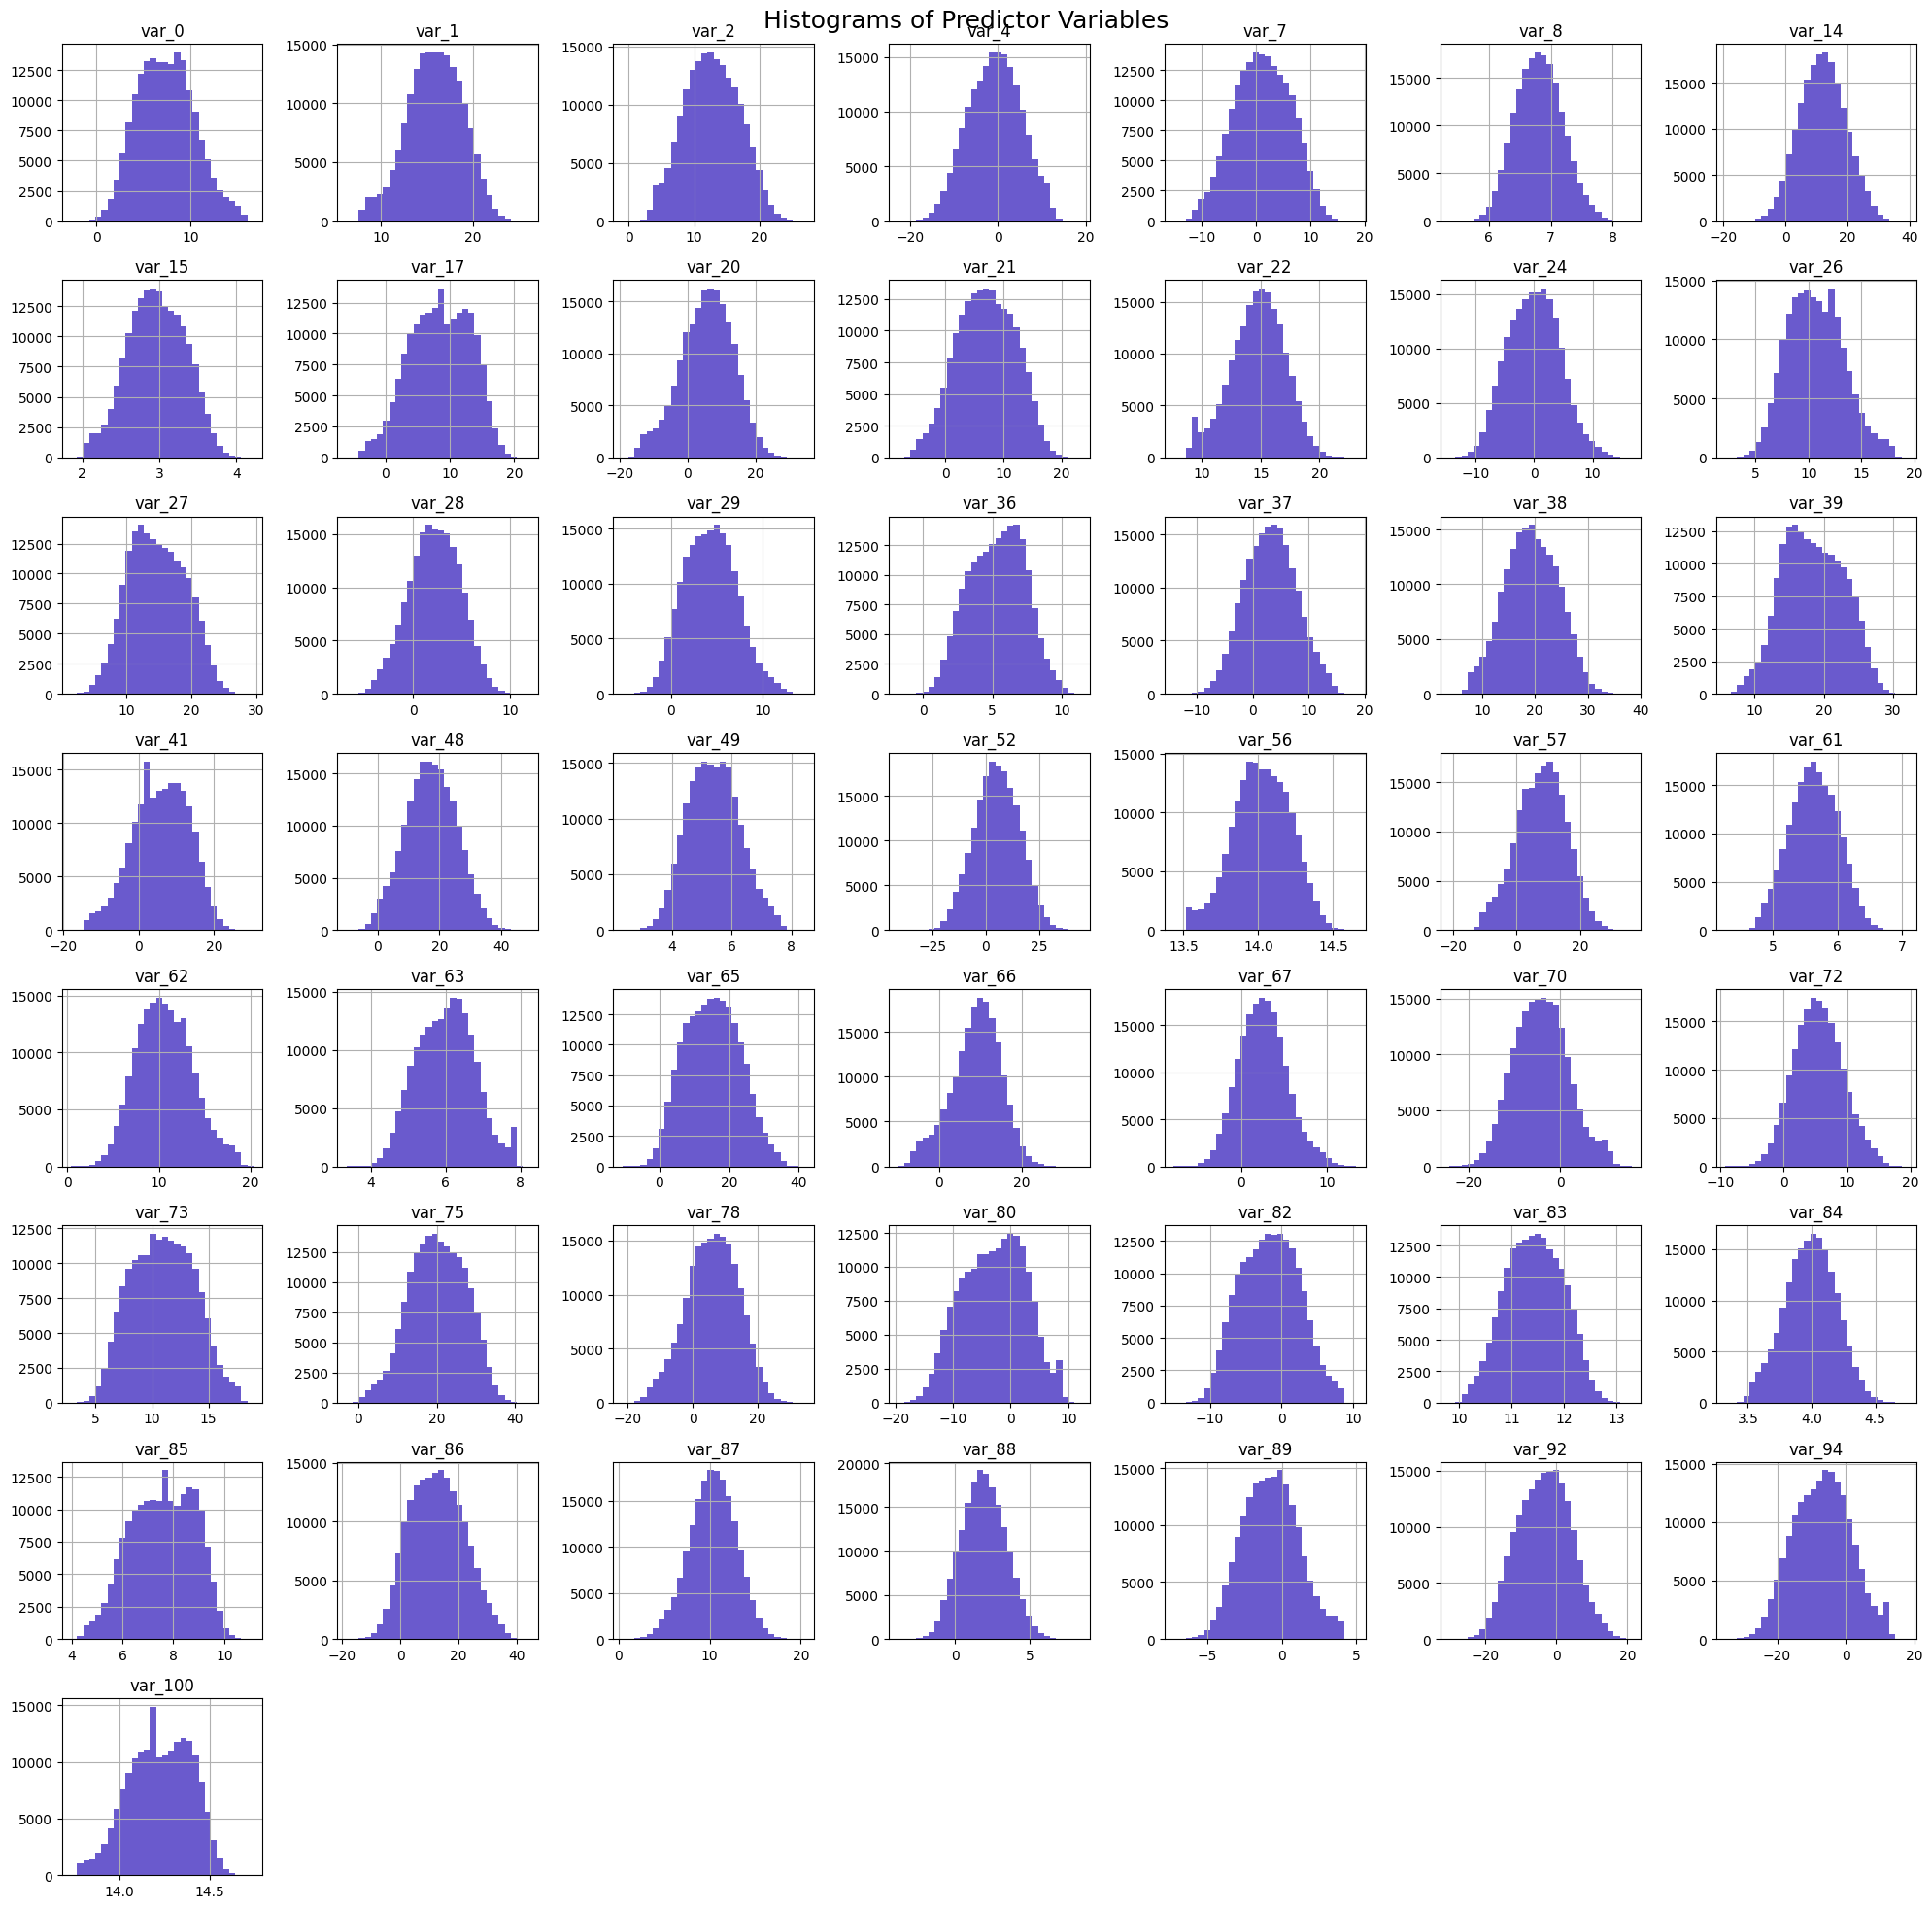

In [ ]:
# Visual inspection of predictor variables for normal distribution

predictor_vars = [c for c in trans_df_clean.columns if c not in ['target']]
trans_df[predictor_vars].hist(figsize=(20,20), bins=30, color='slateblue')
plt.suptitle("Histograms of Predictor Variables", fontsize=18)
plt.tight_layout()
plt.show()


In [ ]:
# Double check that target values still == 0 or 1

check_target_values = trans_df_clean['target'].value_counts()

check_target_values


,count
target,
0.0,161960
1.0,18040


In [ ]:
# Check for skewness of data series

skewed_vars = [
    col for col in trans_df_clean.select_dtypes(include='number').columns
    if abs(trans_df_clean[col].skew()) > 0.05
]
skewed_vars


['target',
 'var_0',
 'var_1',
 'var_4',
 'var_8',
 'var_15',
 'var_17',
 'var_20',
 'var_21',
 'var_22',
 'var_24',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_36',
 'var_37',
 'var_41',
 'var_49',
 'var_56',
 'var_57',
 'var_62',
 'var_63',
 'var_65',
 'var_66',
 'var_67',
 'var_70',
 'var_72',
 'var_73',
 'var_75',
 'var_78',
 'var_80',
 'var_82',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_100']

In [ ]:
drop_skewed_vars = [
 'var_0',
 'var_1',
 'var_4',
 'var_8',
 'var_15',
 'var_17',
 'var_20',
 'var_21',
 'var_22',
 'var_24',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_36',
 'var_37',
 'var_41',
 'var_49',
 'var_56',
 'var_57',
 'var_62',
 'var_63',
 'var_65',
 'var_66',
 'var_67',
 'var_70',
 'var_72',
 'var_73',
 'var_75',
 'var_78',
 'var_80',
 'var_82',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_100']
drop_skewed_vars


['var_0',
 'var_1',
 'var_4',
 'var_8',
 'var_15',
 'var_17',
 'var_20',
 'var_21',
 'var_22',
 'var_24',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_36',
 'var_37',
 'var_41',
 'var_49',
 'var_56',
 'var_57',
 'var_62',
 'var_63',
 'var_65',
 'var_66',
 'var_67',
 'var_70',
 'var_72',
 'var_73',
 'var_75',
 'var_78',
 'var_80',
 'var_82',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_100']

In [ ]:
# Drop skewed data series

trans_df_clean.drop( columns = drop_skewed_vars, inplace = True)
trans_df_clean


,target,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
3,0.0,15.6015,-1.9254,21.6435,17.2850,16.5520,8.1810,-5.6821,5.0713,11.8011,11.1077,-12.6465
5,0.0,17.4788,-6.4882,11.7476,22.9317,16.5595,15.7924,-6.3449,5.7487,11.8294,-2.0111,-3.6166
11,0.0,13.2219,4.0501,18.7136,12.4606,20.5618,17.7082,14.6993,5.8842,11.7464,13.9424,-15.5776
15,0.0,17.9579,-5.4904,8.1019,9.9116,18.1721,18.6652,11.0088,5.7848,11.5481,3.7943,5.6184
19,0.0,10.7630,8.8477,19.0069,16.4656,16.4153,16.0569,3.4665,5.7326,10.8981,-5.6677,-1.8961
...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,10.7295,5.0267,10.0695,22.8797,13.2007,8.4894,5.9445,5.6761,12.1000,10.4219,-19.7158
1049993,0.0,17.3709,-2.5987,3.0420,28.3986,12.5159,30.7570,22.6287,5.4589,10.9960,-2.8052,-13.7290
1049995,1.0,20.5955,-6.8112,14.9182,8.2633,12.3891,5.8544,-18.5661,5.9553,11.2265,1.3921,-16.4925
1049997,0.0,3.9567,1.6614,12.0996,27.3166,15.4494,11.0105,1.5705,5.7636,10.5067,2.0836,-18.6168


In [ ]:
trans_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  float64
 1   var_2   180000 non-null  float64
 2   var_7   180000 non-null  float64
 3   var_14  180000 non-null  float64
 4   var_38  180000 non-null  float64
 5   var_39  180000 non-null  float64
 6   var_48  180000 non-null  float64
 7   var_52  180000 non-null  float64
 8   var_61  180000 non-null  float64
 9   var_83  180000 non-null  float64
 10  var_92  180000 non-null  float64
 11  var_94  180000 non-null  float64
dtypes: float64(12)
memory usage: 17.9 MB


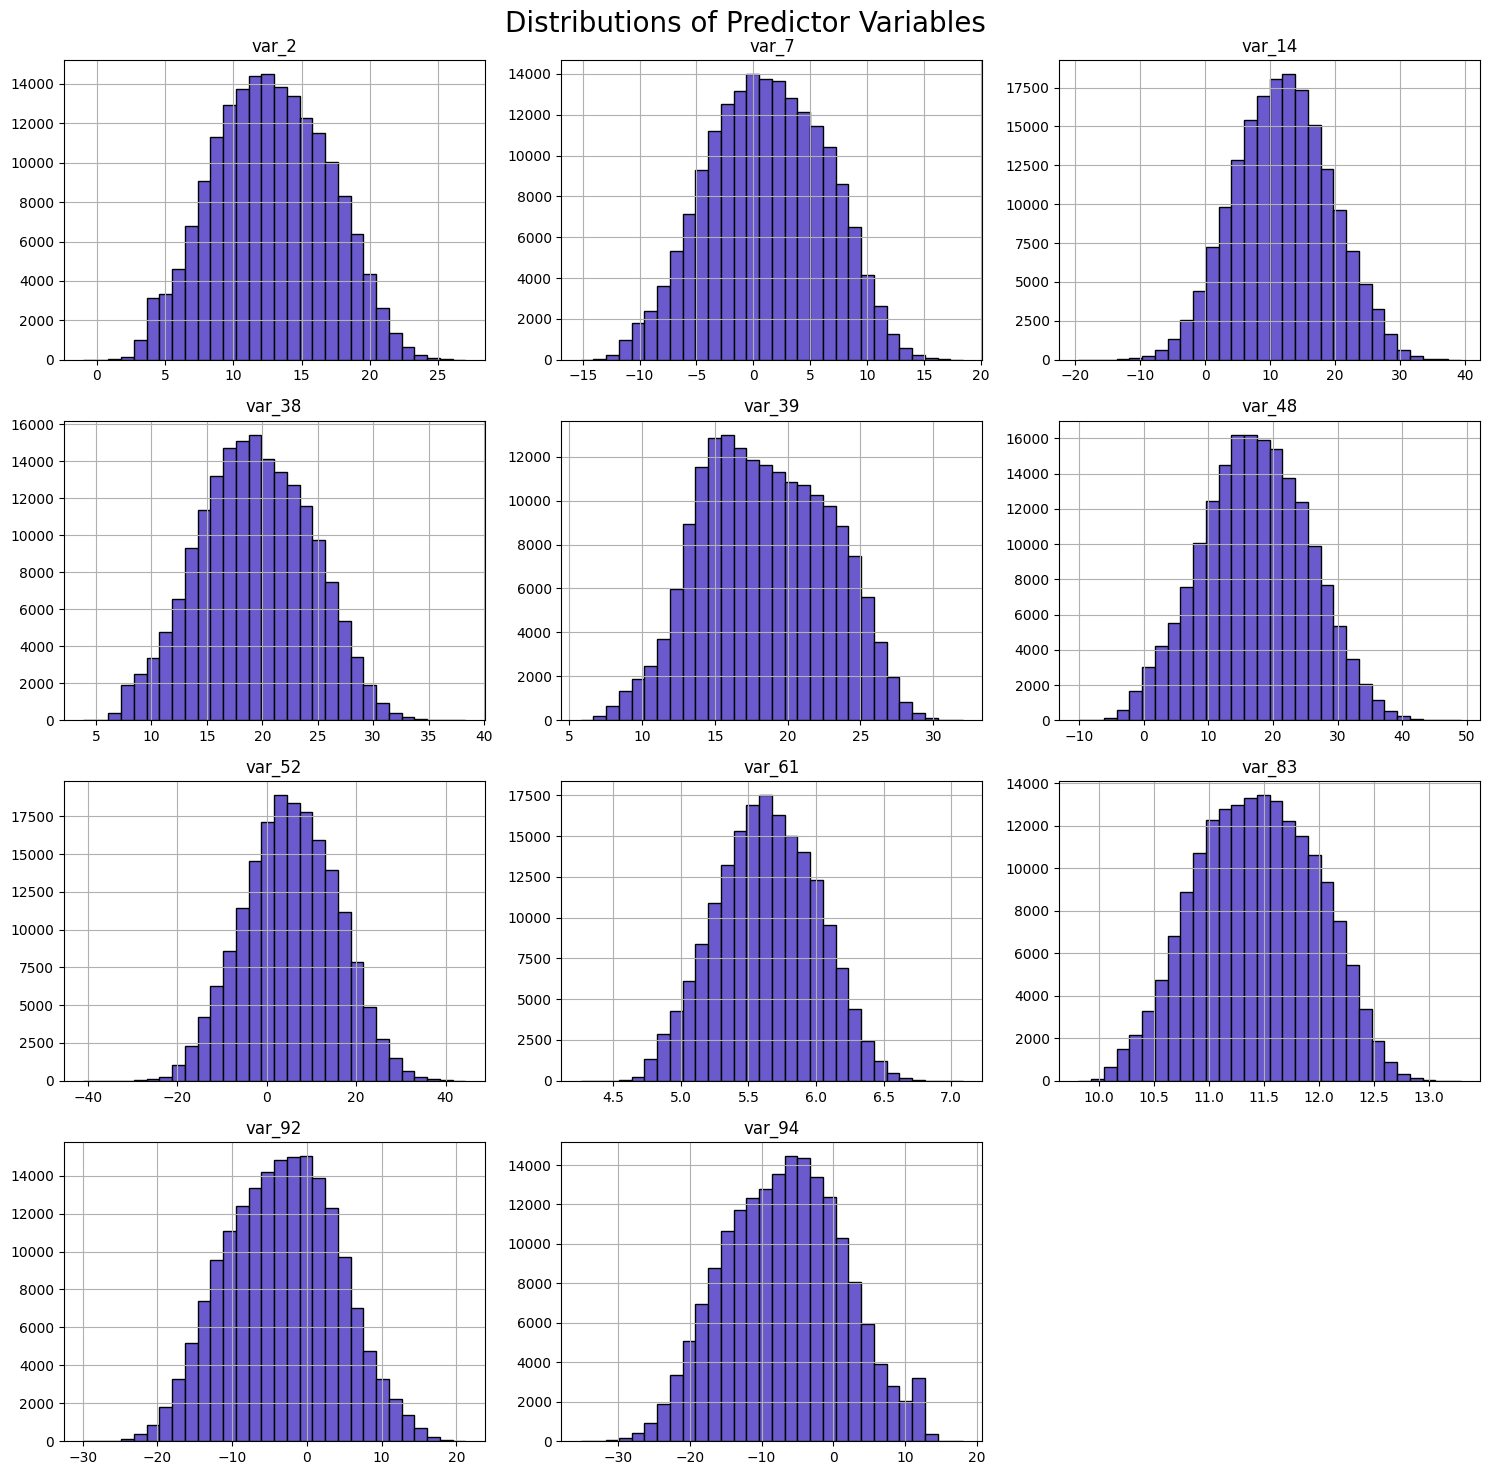

In [ ]:
# Visually inspect normalized predictor variables

predictor_vars = [c for c in trans_df_clean.columns if c not in ['target']]
trans_df_clean[predictor_vars].hist(figsize=(15,15), bins=30, color='slateblue', edgecolor='black')
plt.suptitle("Distributions of Predictor Variables", fontsize=20)
plt.tight_layout()
plt.show()


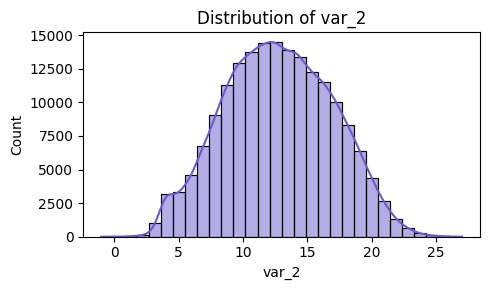

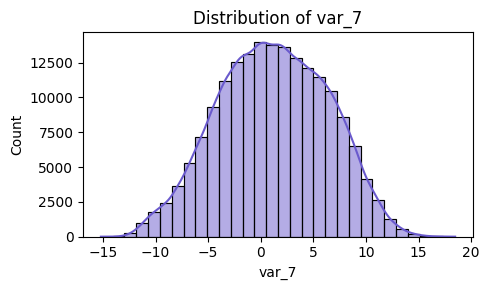

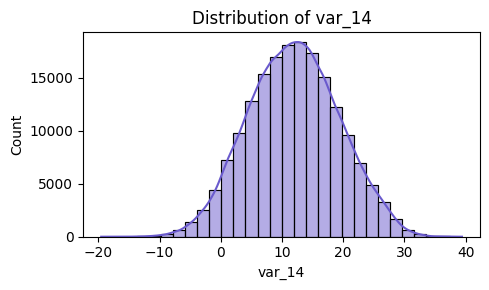

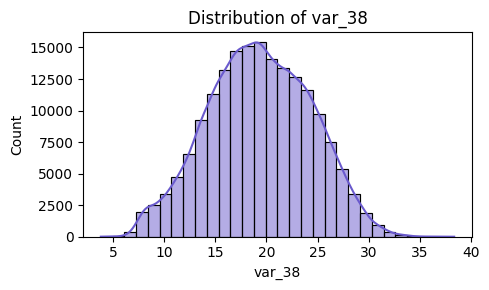

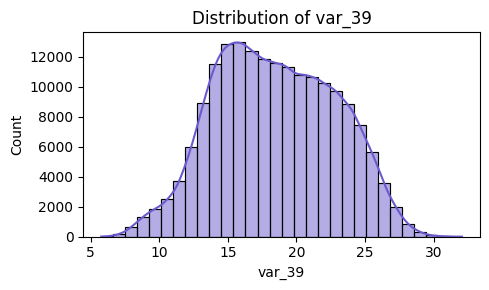

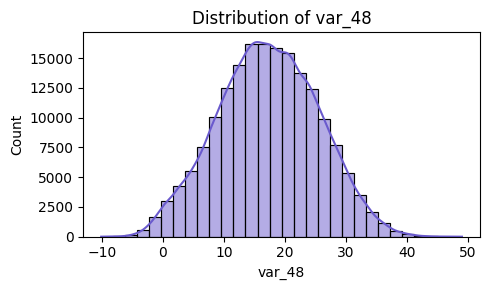

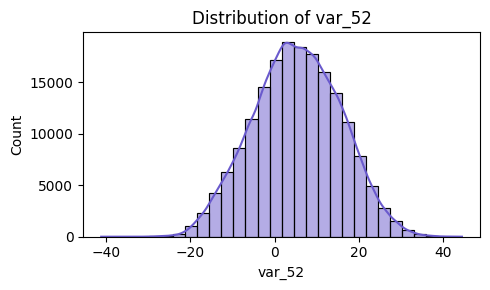

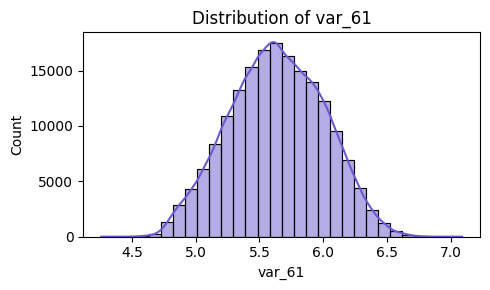

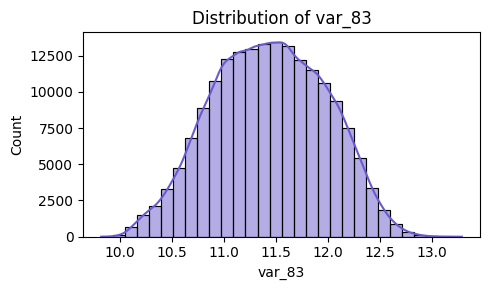

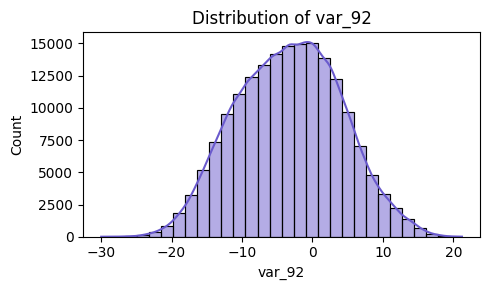

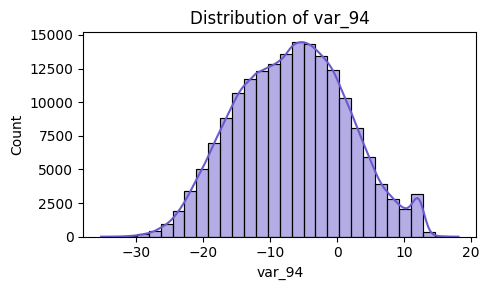

In [ ]:
# Visually inspect normalized predictor variables using KDE

# Select only numeric columns (exclude 'target')
numeric_cols = trans_df_clean.select_dtypes(include='number').columns.drop('target', errors='ignore')

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=trans_df_clean, x=col, kde=True, bins=30, color='slateblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
# Find correlations

corr = trans_df_clean.corr()
corr


,target,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
target,1.000000,-0.046433,-0.041987,0.045281,-0.055704,-0.050278,-0.057378,-0.048198,-0.050049,-0.052324,0.040520,0.049072
var_2,-0.046433,1.000000,-0.000108,-0.002786,0.003147,0.007290,0.004102,0.002107,0.004728,0.004890,-0.003418,-0.001565
var_7,-0.041987,-0.000108,1.000000,-0.003588,0.001852,-0.001919,0.000514,-0.000969,0.001570,-0.000412,0.000236,-0.000568
var_14,0.045281,-0.002786,-0.003588,1.000000,-0.001427,-0.000344,-0.003999,-0.001983,-0.007425,-0.002214,0.005715,0.001501
var_38,-0.055704,0.003147,0.001852,-0.001427,1.000000,0.002300,0.006263,0.004779,0.002589,0.003617,-0.001516,-0.003260
var_39,-0.050278,0.007290,-0.001919,-0.000344,0.002300,1.000000,0.000030,0.000069,0.004112,0.000614,-0.002884,0.000529
var_48,-0.057378,0.004102,0.000514,-0.003999,0.006263,0.000030,1.000000,0.003576,0.006917,0.002605,-0.000502,-0.002722
var_52,-0.048198,0.002107,-0.000969,-0.001983,0.004779,0.000069,0.003576,1.000000,0.007536,0.000601,-0.003495,-0.004599
var_61,-0.050049,0.004728,0.001570,-0.007425,0.002589,0.004112,0.006917,0.007536,1.000000,0.002819,-0.003602,-0.004848
var_83,-0.052324,0.004890,-0.000412,-0.002214,0.003617,0.000614,0.002605,0.000601,0.002819,1.000000,-0.003856,-0.001861


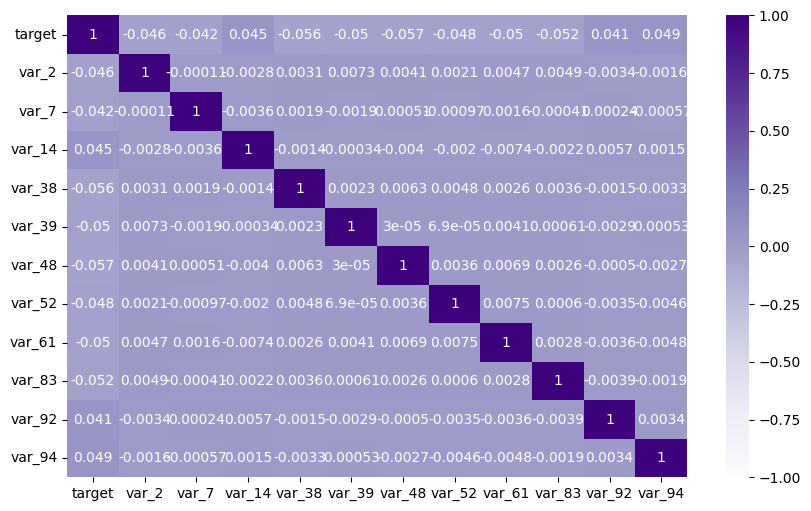

In [ ]:
# Visually inspect data series to ensure there are
# no substantial correlations

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, vmin = -1, vmax = 1, cmap='Purples') ;


### Backup of normalized data

In [ ]:
# Make backup of normalized data series

trans_df_norm = trans_df_clean.copy()
trans_df_norm


,target,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
3,0.0,15.6015,-1.9254,21.6435,17.2850,16.5520,8.1810,-5.6821,5.0713,11.8011,11.1077,-12.6465
5,0.0,17.4788,-6.4882,11.7476,22.9317,16.5595,15.7924,-6.3449,5.7487,11.8294,-2.0111,-3.6166
11,0.0,13.2219,4.0501,18.7136,12.4606,20.5618,17.7082,14.6993,5.8842,11.7464,13.9424,-15.5776
15,0.0,17.9579,-5.4904,8.1019,9.9116,18.1721,18.6652,11.0088,5.7848,11.5481,3.7943,5.6184
19,0.0,10.7630,8.8477,19.0069,16.4656,16.4153,16.0569,3.4665,5.7326,10.8981,-5.6677,-1.8961
...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,10.7295,5.0267,10.0695,22.8797,13.2007,8.4894,5.9445,5.6761,12.1000,10.4219,-19.7158
1049993,0.0,17.3709,-2.5987,3.0420,28.3986,12.5159,30.7570,22.6287,5.4589,10.9960,-2.8052,-13.7290
1049995,1.0,20.5955,-6.8112,14.9182,8.2633,12.3891,5.8544,-18.5661,5.9553,11.2265,1.3921,-16.4925
1049997,0.0,3.9567,1.6614,12.0996,27.3166,15.4494,11.0105,1.5705,5.7636,10.5067,2.0836,-18.6168


In [ ]:
# Make new data frames for successful and unsuccessful transactions

trans_success = trans_df_norm[trans_df_norm['target'] == 1].copy()
trans_fail = trans_df_norm[trans_df_norm['target'] == 0].copy()

trans_success


,target,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
57,1.0,9.4707,0.4521,15.6935,20.8630,23.4864,11.7886,9.2783,6.1622,11.2059,-12.6928,-3.0833
125,1.0,23.5009,-3.9167,21.4162,16.6982,10.0623,12.7596,12.8026,4.9398,10.8110,-9.4101,-15.6555
151,1.0,18.0359,10.1135,11.4553,22.4911,8.5086,2.2855,9.9494,5.8635,11.6326,-1.5409,-7.6389
155,1.0,5.1980,8.4874,16.9541,13.2129,14.8926,26.9641,0.1587,5.2687,11.2981,6.4045,1.1754
302,1.0,12.9317,0.6382,22.4577,16.4613,19.2741,19.9675,-14.0367,5.2723,11.5449,9.8815,-2.9328
...,...,...,...,...,...,...,...,...,...,...,...,...
1049783,1.0,21.3962,-10.0493,25.4931,18.7060,23.6630,18.2678,-15.3658,5.7056,10.9172,5.2623,-0.6030
1049818,1.0,5.8949,5.8840,11.3932,10.3469,22.7869,11.8891,-10.2106,5.4812,11.1665,6.3976,0.5778
1049978,1.0,5.0834,-2.4913,10.7764,18.2433,23.8474,1.9065,3.8029,4.7462,11.6605,2.9477,-2.3696
1049983,1.0,17.7709,-0.8515,11.5599,15.6905,20.8185,7.0423,-2.2534,5.3233,11.8870,14.5286,-5.4146


In [ ]:
trans_fail


,target,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
3,0.0,15.6015,-1.9254,21.6435,17.2850,16.5520,8.1810,-5.6821,5.0713,11.8011,11.1077,-12.6465
5,0.0,17.4788,-6.4882,11.7476,22.9317,16.5595,15.7924,-6.3449,5.7487,11.8294,-2.0111,-3.6166
11,0.0,13.2219,4.0501,18.7136,12.4606,20.5618,17.7082,14.6993,5.8842,11.7464,13.9424,-15.5776
15,0.0,17.9579,-5.4904,8.1019,9.9116,18.1721,18.6652,11.0088,5.7848,11.5481,3.7943,5.6184
19,0.0,10.7630,8.8477,19.0069,16.4656,16.4153,16.0569,3.4665,5.7326,10.8981,-5.6677,-1.8961
...,...,...,...,...,...,...,...,...,...,...,...,...
1049988,0.0,15.4001,1.3116,13.9387,17.3849,12.8715,32.0196,-2.0031,5.7773,11.6062,4.8258,-8.2380
1049990,0.0,10.7295,5.0267,10.0695,22.8797,13.2007,8.4894,5.9445,5.6761,12.1000,10.4219,-19.7158
1049993,0.0,17.3709,-2.5987,3.0420,28.3986,12.5159,30.7570,22.6287,5.4589,10.9960,-2.8052,-13.7290
1049997,0.0,3.9567,1.6614,12.0996,27.3166,15.4494,11.0105,1.5705,5.7636,10.5067,2.0836,-18.6168


## Data Processing



### Training and testing subsets 1

In [ ]:
# Create data frame with predictor columns only

predictor_cols = [c for c in trans_df_norm.columns if c != 'target']
trans_predictors = trans_df_norm[predictor_cols].copy()
trans_predictors


,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
3,15.6015,-1.9254,21.6435,17.2850,16.5520,8.1810,-5.6821,5.0713,11.8011,11.1077,-12.6465
5,17.4788,-6.4882,11.7476,22.9317,16.5595,15.7924,-6.3449,5.7487,11.8294,-2.0111,-3.6166
11,13.2219,4.0501,18.7136,12.4606,20.5618,17.7082,14.6993,5.8842,11.7464,13.9424,-15.5776
15,17.9579,-5.4904,8.1019,9.9116,18.1721,18.6652,11.0088,5.7848,11.5481,3.7943,5.6184
19,10.7630,8.8477,19.0069,16.4656,16.4153,16.0569,3.4665,5.7326,10.8981,-5.6677,-1.8961
...,...,...,...,...,...,...,...,...,...,...,...
1049990,10.7295,5.0267,10.0695,22.8797,13.2007,8.4894,5.9445,5.6761,12.1000,10.4219,-19.7158
1049993,17.3709,-2.5987,3.0420,28.3986,12.5159,30.7570,22.6287,5.4589,10.9960,-2.8052,-13.7290
1049995,20.5955,-6.8112,14.9182,8.2633,12.3891,5.8544,-18.5661,5.9553,11.2265,1.3921,-16.4925
1049997,3.9567,1.6614,12.0996,27.3166,15.4494,11.0105,1.5705,5.7636,10.5067,2.0836,-18.6168


In [ ]:
# Create data frame with target column only

trans_target = trans_df_norm[['target']].copy()
trans_target


,target
3,0.0
5,0.0
11,0.0
15,0.0
19,0.0
...,...
1049990,0.0
1049993,0.0
1049995,1.0
1049997,0.0


In [ ]:
# X = predictors, y = target

X = trans_predictors
y = trans_target['target']
X, y


(           var_2   var_7   var_14   var_38   var_39   var_48   var_52  var_61  \
 3        15.6015 -1.9254  21.6435  17.2850  16.5520   8.1810  -5.6821  5.0713   
 5        17.4788 -6.4882  11.7476  22.9317  16.5595  15.7924  -6.3449  5.7487   
 11       13.2219  4.0501  18.7136  12.4606  20.5618  17.7082  14.6993  5.8842   
 15       17.9579 -5.4904   8.1019   9.9116  18.1721  18.6652  11.0088  5.7848   
 19       10.7630  8.8477  19.0069  16.4656  16.4153  16.0569   3.4665  5.7326   
 ...          ...     ...      ...      ...      ...      ...      ...     ...   
 1049990  10.7295  5.0267  10.0695  22.8797  13.2007   8.4894   5.9445  5.6761   
 1049993  17.3709 -2.5987   3.0420  28.3986  12.5159  30.7570  22.6287  5.4589   
 1049995  20.5955 -6.8112  14.9182   8.2633  12.3891   5.8544 -18.5661  5.9553   
 1049997   3.9567  1.6614  12.0996  27.3166  15.4494  11.0105   1.5705  5.7636   
 1049999  17.5654 -5.5755   5.1813  14.3477  16.7282  27.1135   1.9819  5.8592   
 
           var

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test set
    random_state=0,      # reproducible split
    stratify=y           # stratified split preserves the 0/1 ratio in both sets

)
X_train, X_test, y_train, y_test


(           var_2   var_7   var_14   var_38   var_39   var_48   var_52  var_61  \
 52921    18.9382  4.5281   7.5261  20.6007  15.4940  11.0211   8.4861  6.0202   
 340954   13.2990 -1.5887   3.9875  16.1826  19.7681  29.0021   2.5680  5.5163   
 917722   10.9512 -1.1972  -5.1767  22.3550  12.9186  15.7759   5.1105  5.4786   
 35788     9.5062  0.8256   7.1987  25.5228  17.9518  18.1611  13.4981  5.7594   
 655969    9.9741 -6.9709  17.9815  22.9683  15.0639  33.4164  -3.7975  5.9527   
 ...          ...     ...      ...      ...      ...      ...      ...     ...   
 861601    9.7743 -0.5823   0.7321  11.6363  13.5294  19.9820  -0.2383  6.0043   
 483056    7.1386  5.1515   9.3522  22.5450  22.6686  20.5952 -10.4800  5.7607   
 173021   13.3308 -2.5924   5.9499  29.9557  21.4033  14.4462  -3.1628  5.6960   
 1010344   9.5998  9.5983  24.7985  16.8816  25.1487  23.4920  -6.5155  5.5503   
 450777   17.8820  6.6723   7.3164  22.7440  22.4477  16.7237   5.7687  5.9725   
 
           var

### Model 1 = Gaussian Naive Bayes

In [ ]:
gnb_1 = GaussianNB()

### Fit 1

In [ ]:
gnb_1.fit(X_train, y_train)


GaussianNB()

### Prediction 1

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = gnb_1.predict(X_test) # Same as: 1-(y_test - y_pred).abs().mean()
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8990833333333333


### Cross-validation 1

In [ ]:
n = 100
results = np.zeros(n)

for i in range(n):
  # Training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
  X_train, X_test, y_train, y_test

  # Model
  gnb_1 = GaussianNB()

  # Fit
  gnb_1.fit(X_train,y_train)

  # Prediction
  y_pred = gnb_1.predict(X_test)

  # Performance
  results[i] = 1-(y_test - y_pred).abs().mean()


In [ ]:
results.mean()


np.float64(0.8997491666666667)

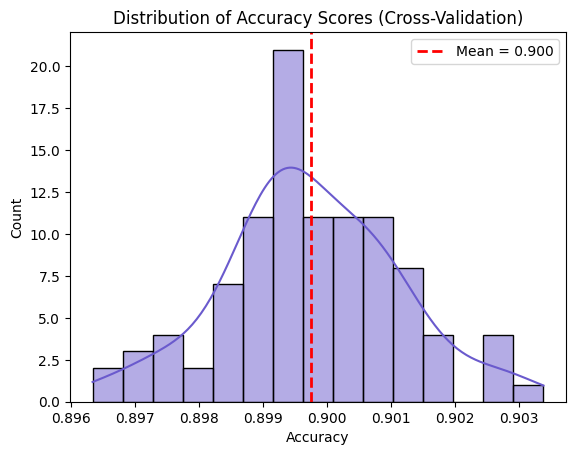

In [ ]:
# Histogram of accuracy scores in cross-validation loop

sns.histplot(results, bins=15, kde=True, color='slateblue', edgecolor='black')
plt.axvline(np.mean(results), color='red', linestyle='--', linewidth=2,
            label=f"Mean = {np.mean(results):.3f}")
plt.title("Distribution of Accuracy Scores (Cross-Validation)", fontsize=12)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.legend()
plt.show()

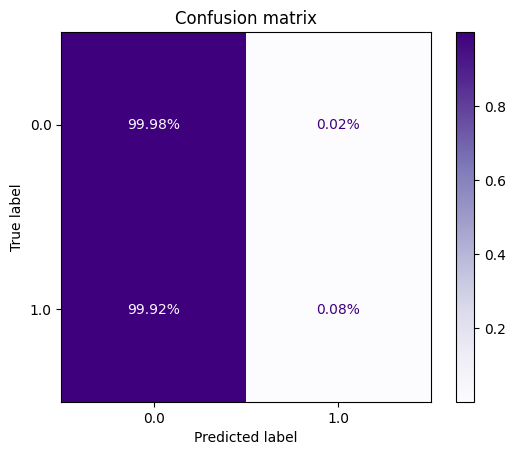

In [ ]:
# Confusion matrix

metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_1,
  X_test,
  y_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'Purples',
)
plt.grid(False)
plt.title('Confusion matrix') ;


In [ ]:
# Classification report

from sklearn.metrics import classification_report

print("Classification report")
print(classification_report(y_test, y_pred))


Classification report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     32351
         1.0       0.38      0.00      0.00      3649

    accuracy                           0.90     36000
   macro avg       0.64      0.50      0.47     36000
weighted avg       0.85      0.90      0.85     36000



### Training and testing subsets 2

In [ ]:
# Make new data frame with 50% successful and 50% failed transactions for repeating
# the cross-validation

# Counts
n_success = len(trans_success)                      # e.g., 18_040

# 1) Downsample the majority class (non-successful = 0)
trans_fail_down = trans_fail.sample(n=n_success, random_state=0).copy()

# 2) Combine the minority class (successful = 1) with the downsampled majority
trans_balanced = (
  pd.concat([trans_success, trans_fail_down], axis=0)
  .sample(frac=1, random_state=0)          # shuffle rows
  .reset_index(drop=True)                   # clean, 0..N-1 index
)

# 3) Sanity check
print(trans_balanced['target'].value_counts())


target
0.0    18040
1.0    18040
Name: count, dtype: int64


In [ ]:
# Create data frame from balanced data set with predictor columns only

predictor_cols_balanced = [c for c in trans_balanced.columns if c != 'target']
trans_predictors_balanced = trans_balanced[predictor_cols_balanced].copy()
trans_predictors_balanced


,var_2,var_7,var_14,var_38,var_39,var_48,var_52,var_61,var_83,var_92,var_94
0,8.3872,6.5840,11.5420,28.7031,14.7775,15.9904,10.5428,5.2878,10.7682,-11.0111,-7.6865
1,9.5231,-0.3857,8.4265,19.3784,26.4428,26.9264,1.2277,5.1058,11.5985,4.5983,-14.7810
2,17.0486,-1.8882,25.1161,16.3943,14.5015,33.2120,21.9024,5.2665,11.7462,2.4097,-3.5215
3,11.8871,2.2650,22.6527,12.8394,12.5105,26.0455,1.0533,5.8041,11.4013,3.5983,-10.2721
4,13.6549,2.4947,1.2005,9.5312,17.1411,2.0937,-15.4194,5.6256,12.0856,-6.6820,5.5857
...,...,...,...,...,...,...,...,...,...,...,...
36075,18.4267,-12.2624,11.3102,14.1311,24.4667,12.2114,7.0094,5.5971,10.9866,-2.8642,-2.2493
36076,12.8142,-0.6602,4.6109,25.7239,14.2469,22.6923,11.5932,5.5759,10.4680,1.1212,0.2938
36077,14.0823,-2.0721,8.1656,21.2205,15.4491,22.4968,-1.1477,5.8278,11.4730,-14.6765,-7.6721
36078,17.6787,-4.5850,17.8686,22.6090,13.9387,6.7419,11.5178,6.3101,11.2169,-10.8214,-4.7312


In [ ]:
# Create data frame from balanced data set with target column only

trans_target_balanced = trans_balanced[['target']].copy()
trans_target_balanced


,target
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
36075,0.0
36076,0.0
36077,0.0
36078,0.0


In [ ]:
# X_b = balanced predictors, y_b = balanced target

X_b = trans_predictors_balanced
y_b = trans_target_balanced['target']
X_b, y_b


(         var_2    var_7   var_14   var_38   var_39   var_48   var_52  var_61  \
 0       8.3872   6.5840  11.5420  28.7031  14.7775  15.9904  10.5428  5.2878   
 1       9.5231  -0.3857   8.4265  19.3784  26.4428  26.9264   1.2277  5.1058   
 2      17.0486  -1.8882  25.1161  16.3943  14.5015  33.2120  21.9024  5.2665   
 3      11.8871   2.2650  22.6527  12.8394  12.5105  26.0455   1.0533  5.8041   
 4      13.6549   2.4947   1.2005   9.5312  17.1411   2.0937 -15.4194  5.6256   
 ...        ...      ...      ...      ...      ...      ...      ...     ...   
 36075  18.4267 -12.2624  11.3102  14.1311  24.4667  12.2114   7.0094  5.5971   
 36076  12.8142  -0.6602   4.6109  25.7239  14.2469  22.6923  11.5932  5.5759   
 36077  14.0823  -2.0721   8.1656  21.2205  15.4491  22.4968  -1.1477  5.8278   
 36078  17.6787  -4.5850  17.8686  22.6090  13.9387   6.7419  11.5178  6.3101   
 36079  22.2311  -0.0224  18.7337  14.2624  15.0382   0.0649   3.6833  5.2862   
 
         var_83   var_92  

In [ ]:
# New balanced training data

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y_b,
    test_size=0.2,       # 20% test set
    random_state=0,      # reproducible split
    stratify=y_b         # stratified split preserves the 0/1 ratio in both sets

)
X_train_b, X_test_b, y_train_b, y_test_b


(         var_2   var_7   var_14   var_38   var_39   var_48   var_52  var_61  \
 24599   7.4832 -4.0856  12.5815  27.2902  15.7019  15.0871  18.2675  6.5682   
 30870   8.5938  1.6286  19.0196  24.0769  13.4875  10.7517   9.7217  5.3762   
 5166   19.1466  1.4678   5.8862  14.2554  16.1408  15.2734  23.2004  5.0767   
 14314   4.2110  0.3477  21.1333  17.3750  11.1095  27.3737  13.2613  5.2280   
 10025  14.0823  9.9680  13.5882  27.8018  23.2355   0.6656  -5.1128  5.2382   
 ...        ...     ...      ...      ...      ...      ...      ...     ...   
 33217  14.7382  1.5726  15.3948  16.1582  25.8176  10.3935 -10.2541  5.8340   
 4261   16.2750 -4.3823  29.0352  25.5907  18.8711  13.7640  11.3749  5.5651   
 10304  18.7107  1.0368   5.2248  26.2957  26.4635  18.7177  13.6139  5.9536   
 24076  16.4886  3.0351  21.0351  26.2807   8.7932  23.0584  -8.2370  5.2625   
 4480    9.9679  1.2033  20.8651  10.7281   6.5346  -0.0320 -12.6677  5.5128   
 
         var_83   var_92   var_94  
 2

### Model 2 = Guassain Naive Bayes

In [ ]:
gnb_2 = GaussianNB()

### Fit 2

In [ ]:
# Use the same gnb model as above; test for fit

gnb_2.fit(X_train_b, y_train_b)


GaussianNB()

### Prediction 2

In [ ]:
y_pred_b = gnb_2.predict(X_test_b)

# 1-(y_test_b - y_pred_b).abs().mean()
print("Accuracy:", accuracy_score(y_test_b, y_pred_b))


Accuracy: 0.6183481152993349


### Cross-validation 2

In [ ]:
# Repeat cross-validation with balanced data frame

n = 100
results_b = np.zeros(n)

for i in range(n):
  # Training and testing sets
  X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.20)
  X_train_b, X_test_b, y_train_b, y_test_b

  # Model
  gnb_2 = GaussianNB()

  # Fit
  gnb_2.fit(X_train_b,y_train_b)

  # Prediction
  y_pred_b = gnb_2.predict(X_test_b)

  # Performance
  results_b[i] = 1-(y_test_b - y_pred_b).abs().mean()


In [ ]:
results_b.mean()


np.float64(0.6154115853658537)

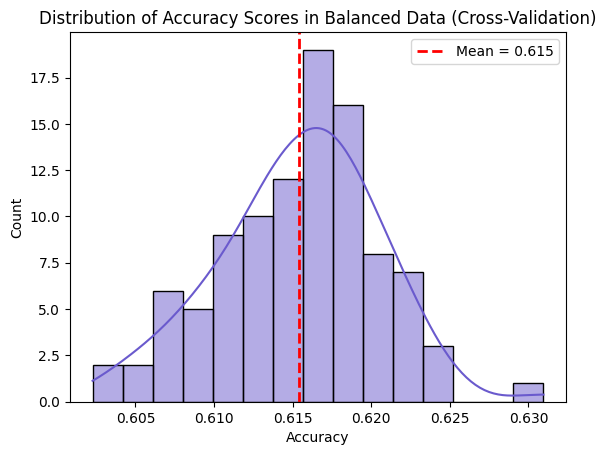

In [ ]:
# Histogram of accuracy scores in cross-validation loop for balanced data set

sns.histplot(results_b, bins=15, kde=True, color='slateblue', edgecolor='black')
plt.axvline(np.mean(results_b), color='red', linestyle='--', linewidth=2,
            label=f"Mean = {np.mean(results_b):.3f}")
plt.title("Distribution of Accuracy Scores in Balanced Data (Cross-Validation)", fontsize=12)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.legend()
plt.show()


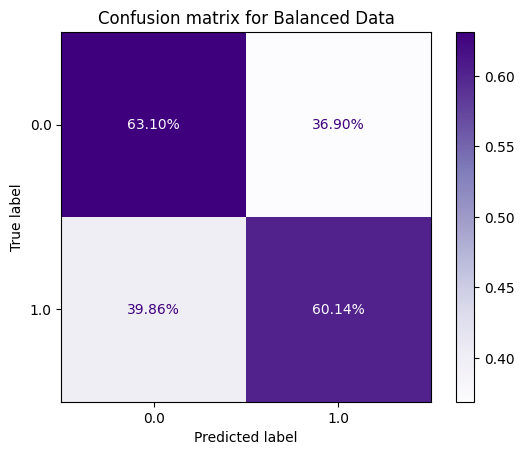

In [ ]:
# Confusion matrix for balanced data

metrics.ConfusionMatrixDisplay.from_estimator(
    gnb_2,
    X_test_b,
    y_test_b,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'Purples',
    )
plt.grid(False)
plt.title('Confusion matrix for Balanced Data') ;


In [ ]:
# Classification report for balanced data

print("Classification report for balanced data")
print(classification_report(y_test_b, y_pred_b))


Classification report for balanced data
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      3618
         1.0       0.62      0.60      0.61      3598

    accuracy                           0.62      7216
   macro avg       0.62      0.62      0.62      7216
weighted avg       0.62      0.62      0.62      7216



## Data Visualization & Results


### Original unbalanced anonymized data

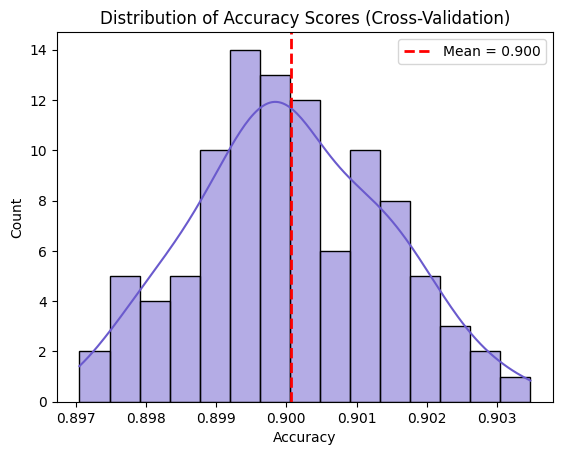

In [ ]:
# Histogram of accuracy scores in cross-validation loop

sns.histplot(results, bins=15, kde=True, color='slateblue', edgecolor='black')
plt.axvline(np.mean(results), color='red', linestyle='--', linewidth=2,
            label=f"Mean = {np.mean(results):.3f}")
plt.title("Distribution of Accuracy Scores (Cross-Validation)", fontsize=12)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.legend()
plt.show()


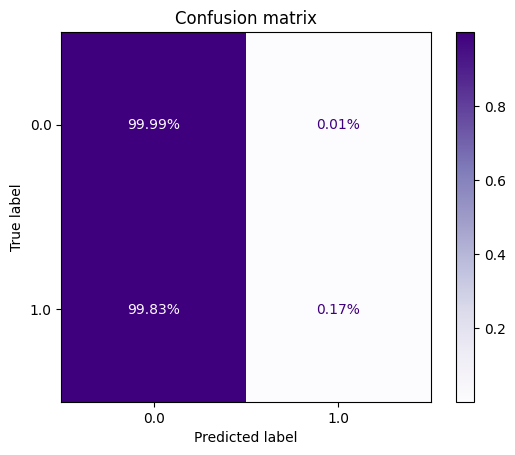

In [ ]:
# Confusion matrix

metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_1,
  X_test,
  y_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'Purples',
)
plt.grid(False)
plt.title('Confusion matrix') ;


In [ ]:
# Classification report

print("Classification report")
print(classification_report(y_test, y_pred))


Classification report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     32365
         1.0       0.60      0.00      0.00      3635

    accuracy                           0.90     36000
   macro avg       0.75      0.50      0.48     36000
weighted avg       0.87      0.90      0.85     36000



### Data balanced for 50% successful and 50% unsuccessful transactions

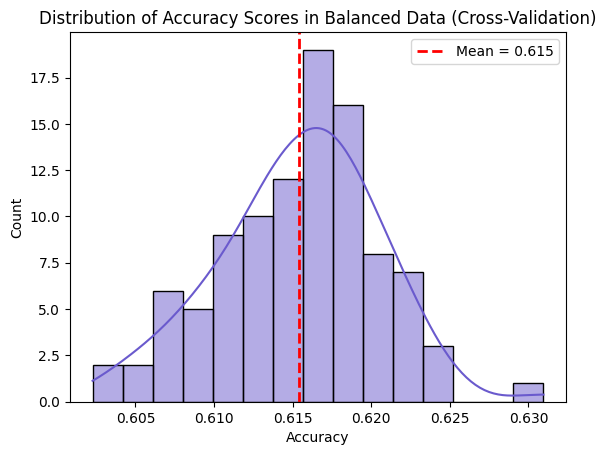

In [ ]:
# Histogram of accuracy scores in cross-validation loop for balanced data set

sns.histplot(results_b, bins=15, kde=True, color='slateblue', edgecolor='black')
plt.axvline(np.mean(results_b), color='red', linestyle='--', linewidth=2,
            label=f"Mean = {np.mean(results_b):.3f}")
plt.title("Distribution of Accuracy Scores in Balanced Data (Cross-Validation)", fontsize=12)
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.legend()
plt.show()


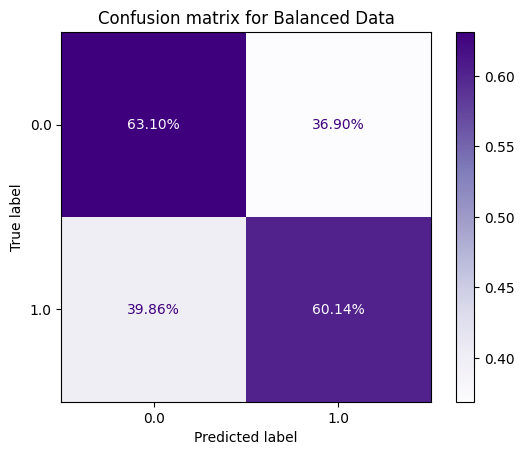

In [ ]:
# Confusion matrix for balanced data

metrics.ConfusionMatrixDisplay.from_estimator(
    gnb_2,
    X_test_b,
    y_test_b,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'Purples',
    )
plt.grid(False)
plt.title('Confusion matrix for Balanced Data') ;


In [ ]:
# Classification report for balanced data

print("Classification report for balanced data")
print(classification_report(y_test_b, y_pred_b))


Classification report for balanced data
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      3618
         1.0       0.62      0.60      0.61      3598

    accuracy                           0.62      7216
   macro avg       0.62      0.62      0.62      7216
weighted avg       0.62      0.62      0.62      7216



## Model Performance Comparison: Unbalanced vs. Balanced Data


The Gaussian Naive Bayes model was evaluated on both the original (imbalanced) dataset and a resampled (balanced) dataset to assess the impact of class imbalance on predictive performance.

⸻

**Unbalanced Dataset (≈ 90% Class 0, 10% Class 1)**

|Metric| Class 0 (No Transaction)|	Class 1 (Transaction)|
 - | :-: | -
Precision |	0.90	 | 0.86
Recall	| 1.00	| 0.00
F1-score |	0.95	| 0.00


**Overall accuracy:** 0.90

**Macro average F1-score:** 0.47

Although the model achieved high overall accuracy (90%), this was misleading because nearly all predictions defaulted to the majority class (0 = no transaction). The recall for class 1 (transactions) was 0.00, indicating that the model failed to identify any successful transactions. This reflects the accuracy paradox: high accuracy despite poor detection of minority-class events.

⸻

**Balanced Dataset (50% Class 0, 50% Class 1)**

|Metric| Class 0 (No Transaction)|	Class 1 (Transaction)|
 - | :-: | -
Precision	| 0.61	| 0.63
Recall	| 0.65	| 0.59
F1-score	| 0.63	| 0.61

**Overall accuracy:** 0.62

**Macro average F1-score:** 0.62

After balancing the training data, overall accuracy decreased from 0.90 to 0.62, which is expected. The model is no longer “cheating” by predicting only the majority class. Instead, it learns to differentiate between both outcomes, achieving similar performance across both classes.
The recall for the minority class improved from 0.00 to 0.59. This is a substantial improvement in the model’s ability to detect actual transactions.

⸻

**Summary:**


>•	Before balancing: High accuracy (0.90) but poor sensitivity to transactions (recall = 0.00).

>•	After balancing: Lower accuracy (0.62) but improved balance between classes (recall ≈ 0.60 for both).

>•	The trade-off between accuracy and fairness between classes reflects a more realistic and useful model for identifying positive cases.



The reduction in overall accuracy after balancing is a positive outcome. The balanced model demonstrates a better ability to detect successful transactions while maintaining comparable performance on non-successful ones. The result is a more informative model that better represents real-world behavior in transaction prediction.